In [2]:
!pip install openpyxl

In [3]:
import pandas as pd
df = pd.read_excel('data_airline_reviews.xlsx')

In [4]:
df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
airline=df[['customer_review','recommended']].copy()

In [6]:
airline.duplicated().sum()

70721

In [7]:
airline.drop_duplicates(inplace=True)

In [8]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61174 entries, 0 to 131894
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customer_review  61173 non-null  object
 1   recommended      59751 non-null  object
dtypes: object(2)
memory usage: 1.4+ MB


In [9]:
airline.dropna(how='all',inplace=True)

In [10]:
airline.isnull().sum()

customer_review       0
recommended        1422
dtype: int64

In [11]:
airline['recommended'].value_counts()

no     31265
yes    28486
Name: recommended, dtype: int64

In [12]:
airline['recommended'].replace({'yes':1,'no':0},inplace=True)

In [13]:
print('recommended Feature Missing Before')
print(airline[['recommended']].isnull().sum())
print('--'*50)

# Impute Electrical with the most frequent value, 'SBrkr'

airline['recommended'] = airline['recommended'].fillna(airline['recommended'].mode()[0])
print('recommended Feature Missing After')
print(airline[['recommended']].isnull().sum())
print('--'*50)

recommended Feature Missing Before
recommended    1422
dtype: int64
----------------------------------------------------------------------------------------------------
recommended Feature Missing After
recommended    0
dtype: int64
----------------------------------------------------------------------------------------------------


In [14]:
airline.head()

,customer_review,recommended
1,âœ… Trip Verified | London to Izmir via Istanb...,1.0
3,âœ… Trip Verified | Istanbul to Bucharest. We ...,0.0
5,âœ… Trip Verified | Rome to Prishtina via Ista...,0.0
7,âœ… Trip Verified | Flew on Turkish Airlines I...,1.0
9,âœ… Trip Verified | Mumbai to Dublin via Istan...,0.0


In [15]:
airline['recommended']=airline['recommended'].astype('int')

In [16]:
airline.head()

,customer_review,recommended
1,âœ… Trip Verified | London to Izmir via Istanb...,1
3,âœ… Trip Verified | Istanbul to Bucharest. We ...,0
5,âœ… Trip Verified | Rome to Prishtina via Ista...,0
7,âœ… Trip Verified | Flew on Turkish Airlines I...,1
9,âœ… Trip Verified | Mumbai to Dublin via Istan...,0


In [17]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer()
docs = (['Roses are Red',
         'The sky is blue',
         'Roses are Red, The sky is blue, sum of one and one is two'])
bag = count.fit_transform(docs)

print(count.vocabulary_)
print(bag.toarray())

{'roses': 7, 'are': 1, 'red': 6, 'the': 10, 'sky': 8, 'is': 3, 'blue': 2, 'sum': 9, 'of': 4, 'one': 5, 'and': 0, 'two': 11}
[[0 1 0 0 0 0 1 1 0 0 0 0]
 [0 0 1 1 0 0 0 0 1 0 1 0]
 [1 1 1 2 1 2 1 1 1 1 1 1]]


In [18]:
from sklearn.feature_extraction.text import TfidfTransformer
np.set_printoptions(precision=2)

tfidf = TfidfTransformer(use_idf=True, norm='l2', smooth_idf=True)

print(tfidf.fit_transform(bag).toarray())

[[0.   0.58 0.   0.   0.   0.   0.58 0.58 0.   0.   0.   0.  ]
 [0.   0.   0.5  0.5  0.   0.   0.   0.   0.5  0.   0.5  0.  ]
 [0.27 0.2  0.2  0.41 0.27 0.54 0.2  0.2  0.2  0.27 0.2  0.27]]


In [19]:
import re
def preprocessor(text):
  text =re.sub('<[^>]*>', '', text)
  emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
  text = re.sub('[\W]+', ' ', text.lower()) + ' '.join(emoticons).replace('-', '')
  
  return text

preprocessor("Testing out a :) sentence to preprocess :-( !")

'testing out a sentence to preprocess :) :('

In [20]:
airline['customer_review'] = airline['customer_review'].apply(preprocessor)
airline['customer_review']

1         âœ trip verified london to izmir via istanbul ...
3         âœ trip verified istanbul to bucharest we make...
5         âœ trip verified rome to prishtina via istanbu...
7         âœ trip verified flew on turkish airlines iad ...
9         âœ trip verified mumbai to dublin via istanbul...
                                ...                        
131886    two domestic flights between kiev and lviv las...
131888    i had a good flight from london to kiev with u...
131890    kiev london gatwick in business class in april...
131892    several flights kbp to ams 3 times one way lgw...
131894    kbp ams with uia although it was a relatively ...
Name: customer_review, Length: 61173, dtype: object

In [21]:
!pip install nltk
from nltk.stem.porter import PorterStemmer

porter = PorterStemmer()

def tokenizer(text):
  return text.split()

def tokenizer_stemmer(text):
  return[porter.stem(word) for word in text.split()]

tokenizer("Let's see how tokenizer and stemming tokenizer are working")

["Let's",
 'see',
 'how',
 'tokenizer',
 'and',
 'stemming',
 'tokenizer',
 'are',
 'working']

In [22]:
tokenizer_stemmer("Let's see how tokenizer and stemming tokenizer are working")

["let'", 'see', 'how', 'token', 'and', 'stem', 'token', 'are', 'work']

In [23]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sauga\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
from nltk.corpus import stopwords

stop = stopwords.words('english')
[w for w in tokenizer_stemmer("Let's see how tokenizer and stemming tokenizer are working") if w not in stop]

["let'", 'see', 'token', 'stem', 'token', 'work']

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(strip_accents=None,
                         lowercase=True,
                         preprocessor=None,  # Need not apply as it is already applied during Data Cleaning
                         use_idf=True,
                         norm='l2',
                         smooth_idf=True)

y = airline.recommended.values
X = tfidf.fit_transform(airline.customer_review)

In [26]:
from sklearn.model_selection import train_test_split
import pickle
from sklearn.linear_model import LogisticRegressionCV


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.5, shuffle=False)

clf = LogisticRegressionCV(cv=5,
                           scoring='accuracy',
                           random_state=0,
                           n_jobs=-1,
                           verbose=3,
                           max_iter=300).fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.6min remaining:  2.4min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.2min finished


In [27]:
clf.score(X_test, y_test)

0.8957727138980612

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


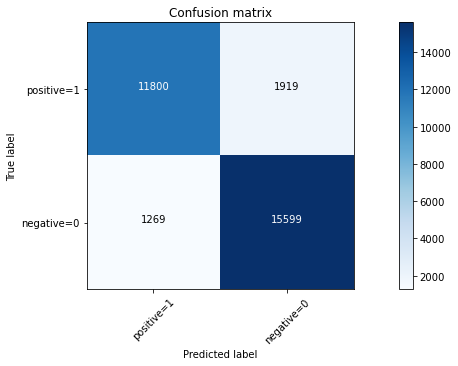

In [29]:
yhat = clf.predict(X_test)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure(figsize=(13,5))
plot_confusion_matrix(cnf_matrix, classes=['positive=1','negative=0'],normalize= False,  title='Confusion matrix')

In [30]:
import pickle

#Dumping the Tfidf model built

with open('tfidf_airline.pkl', 'wb') as file_output:
    pickle.dump(tfidf, file_output)

##############################################################

#Dumping the sentiment analysis model built

with open('mle_deployment_review_model.pkl', 'wb') as file_output:
    pickle.dump(clf, file_output)

In [31]:
mle = pickle.load(open('mle_deployment_review_model.pkl','rb'))
tfidf_vect = pickle.load(open('tfidf_airline.pkl','rb'))



data = ["Experience was awesome"]
vect = tfidf_vect.transform(data).toarray()
my_prediction = mle.predict(vect)
print(my_prediction)

data = ["Experience was bad"]
vect = tfidf_vect.transform(data).toarray()
my_prediction = mle.predict(vect)
print(my_prediction)

[1]
[0]
